In [1]:
from ase.io import read
from ase.visualize import view
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

In [2]:
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8,6)

In [3]:
def get_vacuum_energy(pref, conf="B", avg_type='local'):
    
    outfile = f"/scratch/kilian/out/conf_{conf}/{pref}/avg.dat"
    
    with open(outfile) as f:
        lines = f.readlines()
        
    if avg_type == 'local':
        avg_ind = 1
    else:
        avg_ind = 2

    max_f = float(lines[0].split()[avg_ind])
    min_f = float(lines[0].split()[avg_ind])
    for line in lines:
        V = float(line.split()[avg_ind])
        if V > max_f:
            max_f = V
        if V < min_f:
            min_f = V
            
    return round(max_f,4)

def get_symm_pt(pref, conf, spec_path=None, plot_brouillon=False):

    outfile = f"/scratch/kilian/out/conf_{conf}/{pref}/{pref}_bands.out"
    
    with open(outfile) as f:
        lines = f.readlines()
    
    coords = []
    for line in lines:
        if "high-symmetry point:" in line:
            coords.append(float(line.split(' ')[-1]))
            
    
    relax = f"/scratch/kilian/out/conf_{conf}/{pref}/{pref}_relax.pwo"
    atoms = read(relax, format='espresso-out')

    lat = atoms.cell.get_bravais_lattice()
    pts_list = lat.get_special_points()
    pts = ''.join([str(item) for item in pts_list])
    path = list(atoms.cell.bandpath(pts, npoints=100).path)
    
#     if plot_brouillon == True:
#         atoms.cell.bandpath(pts, npoints=100).plot()
#         plt.show()
    
    if spec_path == None:
        return dict(zip(path, coords))
    else:
        my_path = {}
        for i,p in enumerate(spec_path):
            my_path[spec_path[i]] = coords[i]
        return my_path

In [4]:
def plot_wannier_bands(pref, conf, bands2plot=[], fermi=None, ylimit=None):
    
    confname=conf[0]
    
    w_datadir = f"/scratch/kilian/out/conf_{confname}/{pref}/"
    #w_datadir = f"/work/c3mp/kilian/C6H4_C6H4_7jul/"
    w_data = np.loadtxt(f"{w_datadir}{pref}_band.dat")
    w_k = np.unique(w_data[:,0])
    w_bands = np.reshape(w_data[:,1], (-1, len(w_k)))
    
    datadir = f"/scratch/kilian/out/conf_{confname}/{pref}/"
    data = np.loadtxt(f"{datadir}{pref}_bands.dat.gnu")
    k = np.unique(data[:,0])
    bands = np.reshape(data[:,1], (-1, len(k)))
    
    if conf == "C":
        spec_path = 'GYHG'
    elif conf == "Brr":
        spec_path = "GX"
    else:
        spec_path = None
    symms = get_symm_pt(pref, confname, plot_brouillon=False, spec_path=spec_path)
    
    e_vacuum = get_vacuum_energy(pref, conf=confname)
    
    
#    if 'B' in conf:
    w_k *= (k[-1])/(w_k[-1])
    for band in range(len(w_bands)):
        #e_vacuum = 0
        scaled_band = np.subtract(w_bands[band, :], e_vacuum)
        plt.plot(w_k, scaled_band, linewidth=.5, alpha=1, color='k')
        
    for band in range(len(bands)):
        if band+1 in bands2plot:
            scaled_band = np.subtract(bands[band, :], e_vacuum)
            plt.plot(k, scaled_band, linewidth=7, alpha=0.25, color='r')    
        
    plt.ylim(ylimit)
    

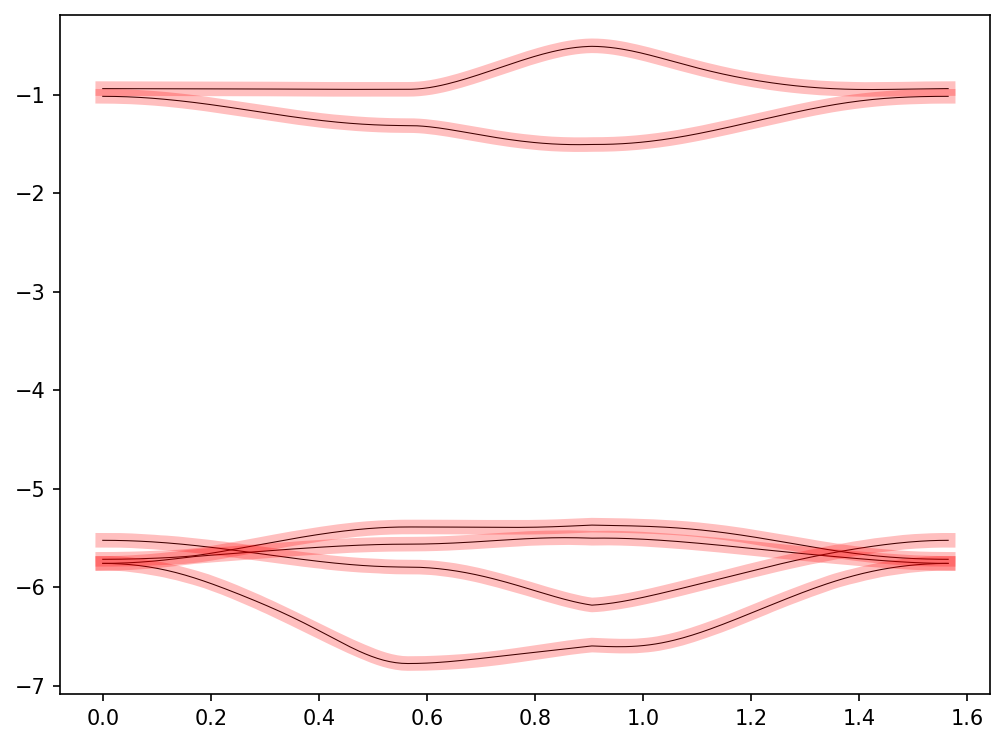

In [5]:
bannds2plot = [24,25,26,27,28,29]
plot_wannier_bands('C6H3_B3O3', conf="C",bands2plot=bannds2plot)

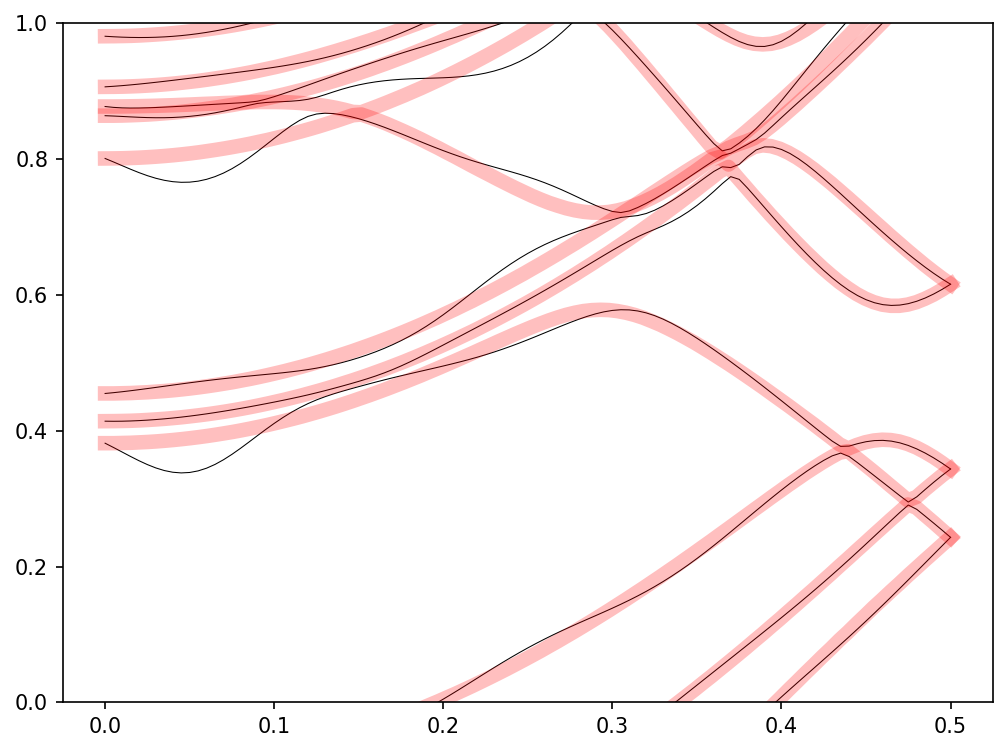

In [14]:
bannds2plot = [23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
              41,42,43,44,45,46,47,48,49,50]
plot_wannier_bands('C6H4_C6H4', 'Brr', ylimit=[0,1],bands2plot=bannds2plot)

[0.     0.0107 0.0213 0.032  0.0426 0.0533 0.0639 0.0746 0.0852 0.0959
 0.1065 0.1172 0.1279 0.1385 0.1492 0.1598 0.1705 0.1811 0.1918 0.2024
 0.2131 0.2238 0.2344 0.2451 0.2557 0.2664 0.277  0.2877 0.2983 0.309
 0.3196 0.3303 0.341  0.3516 0.3623 0.3729 0.3836 0.3942 0.4049 0.4155
 0.4262 0.4368 0.4475 0.4582 0.4688 0.4795 0.4901 0.5008 0.5114 0.5221
 0.5327 0.5434 0.5541 0.5647 0.5754 0.586  0.5966 0.6073 0.6179 0.6286
 0.6392 0.6498 0.6605 0.6711 0.6818 0.6924 0.7031 0.7137 0.7243 0.735
 0.7456 0.7563 0.7669 0.7776 0.7882 0.7988 0.8095 0.8201 0.8308 0.8414
 0.8521 0.8627 0.8733 0.884  0.8946 0.9053 0.9156 0.9259 0.9362 0.9465
 0.9568 0.9671 0.9774 0.9877 0.998  1.0083 1.0186 1.0289 1.0392 1.0495
 1.0598 1.0701 1.0804 1.0907 1.101  1.1114 1.1217 1.132  1.1423 1.1526
 1.1629 1.1732 1.1835 1.1938 1.2041 1.2144 1.2247 1.235  1.2453 1.2556
 1.2659 1.2762 1.2865 1.2968 1.3071 1.3174 1.3277 1.338  1.3483 1.3586
 1.3689 1.3793 1.3896 1.3999 1.4102 1.4205 1.4308 1.4411 1.4514 1.4617
 1.472  

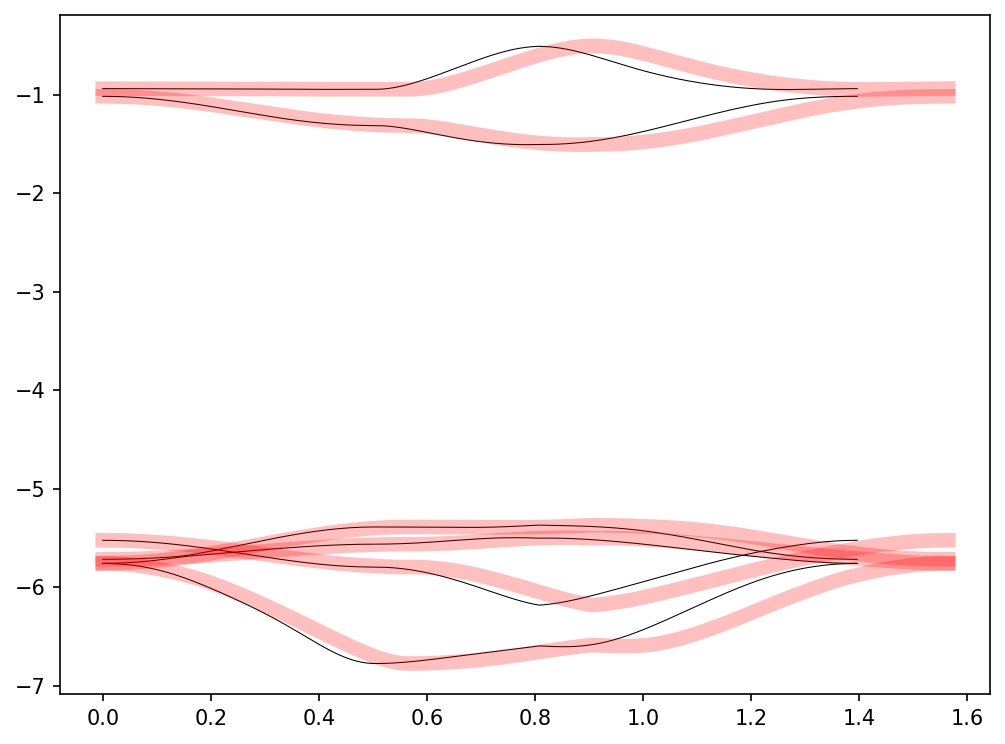